In [ ]:
#Sequential 사용하지 못하는 것은 수직이기 때문에
#Model : functional : multi input /  __init__()
#Model은 비지도 학습을 위해 1개, 인코드 예측과 디코드 예측을 위해 각 1개 도합 3개를 사용함
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

encoding_dim = 32
input_img = Input(shape=(784, ))

# encoded = Dense(encoding_dim, activation="relu")(input_img)
# encoded = Dense(128, activation = "relu")(encoded)
# encoded = Dense(64, activation = "relu")(encoded)
#encoded = Dense(encoding_dim, activation="relu", activity_regularizer = regularizers.l1(10e-5))(input_img) #수축
encoded = Dense(encoding_dim, activation="relu")(input_img)
# decoded = Dense(64, activation="relu")(encoded)
# decoded = Dense(128, activation="relu")(decoded)
decoded = Dense(784, activation="sigmoid")(encoded)

autoencoder = Model(input_img, decoded)  #autoencoder 얘한방으로 다됨 

# decoder,encoder 를 만든 이유는 값을 예측하기 위해서 만듬_predict
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim, ))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [48]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [49]:
autoencoder.compile(optimizer='adadelta', loss="binary_crossentropy")
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3728 - val_loss: 0.2728
Epoch 2/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2658 - val_loss: 0.2556
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2452 - val_loss: 0.2326
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2241 - val_loss: 0.2136
Epoch 5/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2081 - val_loss: 0.2003
Epoch 6/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1966 - val_loss: 0.1907
Epoch 7/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1881 - val_loss: 0.1831
Epoch 8/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1811 - val_loss: 0.1767
Epoch 9/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1751 - val_loss: 0.1711
Epoch

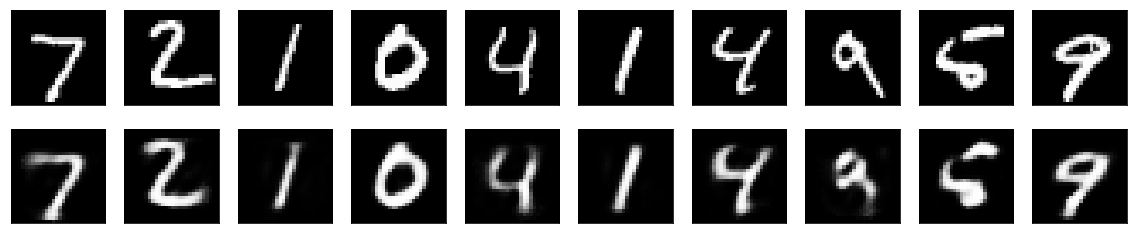

In [50]:
%matplotlib inline
import matplotlib.pylab as plt
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [51]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(8, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(8, (3, 3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1038 - val_loss: 0.1017
Epoch 2/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1031 - val_loss: 0.1011
Epoch 3/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1025 - val_loss: 0.1005
Epoch 4/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1019 - val_loss: 0.1000
Epoch 5/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1014 - val_loss: 0.0995
Epoch 6/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1009 - val_loss: 0.0991
Epoch 7/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1005 - val_loss: 0.0986
Epoch 8/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1001 - val_loss: 0.0983
Epoch 9/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0997 - val_loss: 0.0979
Epoch

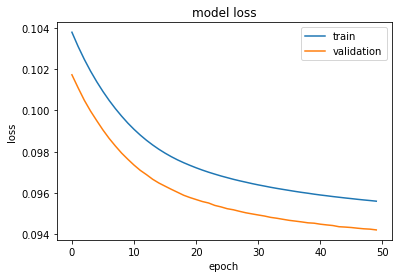

In [52]:
from keras.callbacks import TensorBoard
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [ ]:
x = Input(shape=(28, 28, 1))

conv1_1 = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
pool1 = MaxPooling2D((2, 2), padding="same")(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation="relu", padding="same")(pool1)
h = MaxPooling2D((2, 2), padding="same")(conv1_2)

conv2_1 = Conv2D(32, (3, 3), activation="relu", padding="same")(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation="relu", padding="same")(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
r = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(up2)

autoencoder = Model(inputs = x, outputs=r)
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

In [ ]:
epochs = 3
batch_size = 128
history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                          validation_data=(X_test_noisy, X_test))
encoded_imgs = encoder.predict(X_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
32768/60000 [===============>..............] - ETA: 40:16 - loss: 0.6682

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [1]:
import matplotlib as mpl

# This line allows mpl to run with no DISPLAY defined
mpl.use('Agg')

import pandas as pd
import numpy as np
import os
from keras.layers import Reshape, Flatten, LeakyReLU, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras_adversarial.image_grid_callback import ImageGridCallback
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import normal_latent_sampling, AdversarialOptimizerSimultaneous
from keras_adversarial.legacy import l1l2, Dense, fit
import keras.backend as K
import numpy as np
from keras.datasets import mnist


def mnist_process(x):
    x = x.astype(np.float32) / 255.0
    return x


def mnist_data():
    (xtrain, ytrain), (xtest, ytest) = mnist.load_data()
    return mnist_process(xtrain), mnist_process(xtest)

def model_generator(latent_dim, input_shape, hidden_dim=1024, reg=lambda: l1l2(1e-5, 1e-5)):
    return Sequential([
        Dense(int(hidden_dim / 4), name="generator_h1", input_dim=latent_dim, W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(int(hidden_dim / 2), name="generator_h2", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(hidden_dim, name="generator_h3", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(np.prod(input_shape), name="generator_x_flat", W_regularizer=reg()),
        Activation('sigmoid'),
        Reshape(input_shape, name="generator_x")],
        name="generator")


def model_discriminator(input_shape, hidden_dim=1024, reg=lambda: l1l2(1e-5, 1e-5), output_activation="sigmoid"):
    return Sequential([
        Flatten(name="discriminator_flatten", input_shape=input_shape),
        Dense(hidden_dim, name="discriminator_h1", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(int(hidden_dim / 2), name="discriminator_h2", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(int(hidden_dim / 4), name="discriminator_h3", W_regularizer=reg()),
        LeakyReLU(0.2),
        Dense(1, name="discriminator_y", W_regularizer=reg()),
        Activation(output_activation)],
        name="discriminator")


def example_gan(adversarial_optimizer, path, opt_g, opt_d, nb_epoch, generator, discriminator, latent_dim,
                targets=gan_targets, loss='binary_crossentropy'):
    csvpath = os.path.join(path, "history.csv")
    if os.path.exists(csvpath):
        print("Already exists: {}".format(csvpath))
        return

    print("Training: {}".format(csvpath))
    # gan (x - > yfake, yreal), z generated on GPU
    gan = simple_gan(generator, discriminator, normal_latent_sampling((latent_dim,)))

    # print summary of models
    generator.summary()
    discriminator.summary()
    gan.summary()

    # build adversarial model
    model = AdversarialModel(base_model=gan,
                             player_params=[generator.trainable_weights, discriminator.trainable_weights],
                             player_names=["generator", "discriminator"])
    model.adversarial_compile(adversarial_optimizer=adversarial_optimizer,
                              player_optimizers=[opt_g, opt_d],
                              loss=loss)

    # create callback to generate images
    zsamples = np.random.normal(size=(10 * 10, latent_dim))

    def generator_sampler():
        return generator.predict(zsamples).reshape((10, 10, 28, 28))

    generator_cb = ImageGridCallback(os.path.join(path, "epoch-{:03d}.png"), generator_sampler)

    # train model
    xtrain, xtest = mnist_data()
    y = targets(xtrain.shape[0])
    ytest = targets(xtest.shape[0])
    callbacks = [generator_cb]
    if K.backend() == "tensorflow":
        callbacks.append(
            TensorBoard(log_dir=os.path.join(path, 'logs'), histogram_freq=0, write_graph=True, write_images=True))
    history = fit(model, x=xtrain, y=y, validation_data=(xtest, ytest), callbacks=callbacks, nb_epoch=nb_epoch,
                  batch_size=32)

    # save history to CSV
    df = pd.DataFrame(history.history)
    df.to_csv(csvpath)

    # save models
    generator.save(os.path.join(path, "generator.h5"))
    discriminator.save(os.path.join(path, "discriminator.h5"))


def main():
    # z \in R^100
    latent_dim = 100
    # x \in R^{28x28}
    input_shape = (28, 28)
    # generator (z -> x)
    generator = model_generator(latent_dim, input_shape)
    # discriminator (x -> y)
    discriminator = model_discriminator(input_shape)
    example_gan(AdversarialOptimizerSimultaneous(), "output/gan",
                opt_g=Adam(1e-4, decay=1e-4),
                opt_d=Adam(1e-3, decay=1e-4),
                nb_epoch=100, generator=generator, discriminator=discriminator,
                latent_dim=latent_dim)


if __name__ == "__main__":
    main()

KeyboardInterrupt: 

In [ ]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_gray = cv2.imread("plane.jpg")
plt.imshow(image_gray), plt.axis("off")
plt.show()
image_gray = cv2.imread("plane.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image_gray, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10

image_binarized = cv2.adaptiveThreshold(image_gray,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)
plt.imshow(image_binarized, cmap='gray'), plt.axis('off')
plt.show()

In [ ]:
median_intensity = np.median(image_gray)
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
plt.imshow(image_canny, cmap='gray'), plt.axis('off')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
from IPython import display
vc = cv2.VideoCapture("corrupted_video.mp4")
if vc.isOpened():
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)
else:
    is_capturing = False

In [ ]:
while is_capturing:
    try:
        is_capturing, frame = vc.read()
        try:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            webcam_preview.set_data(frame)
            plt.draw()
            display.clear_output(wait=True)
            display.display(plt.gcf())
            plt.pause(0.05)
        except:
            is_capturing = False
    except KeyboardInterrupt:
        vc.release()

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture("corrupted_video.mp4")
fourcc = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter("output.avi", fourcc, 20.0, (640, 480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame, 0)
        out.write(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
out.release()

In [ ]:
#skvideo를 이용한 프레임 처리
import skvideo.io
import skvideo.datasets
import numpy as np

filename = skvideo.datasets.bigbuckbunny()
vid_in = skvideo.io.FFmpegReader(filename)
data = skvideo.io.ffprobe(filename)["video"] #비디오 정보 추출
rate = data["@r_frame_rate"] #초당 프레임율
T = np.int(data["@nb_frames"]) #전체 프리임
vid_out = skvideo.io.FFmpegWriter("corrupted_video_2.mp4", inputdict={
    "-r" : rate,
    },
    outputdict={
        "-vcodec":"libx264", #264코덱
        "-pix_fmt":"yuv420p", #poxel format
        "-r":rate, #출력 비트율
    })

for idx, frame in enumerate(vid_in.nextFrame()):
    print("Writing frame %d/%d" % (idx, T))
    if (idx >= (T/2)) & (idx <= (T/2 + 10)):
        frame = np.random.normal(128, 128, size=frame.shape).astype(np.uint8)
    vid_out.writeFrame(frame)
vid_out.close()

In [ ]:
img = cv2.imread("plane.jpg", 0)
cv2.waitKey(0)
cv2.namedWindow("image",cv2.WINDOW_NORMAL) #별도의 창에서 출력
cv2.imshow("image", img)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()
elif k == ord("s"): #s 키를 누르면 저장
    cv2.imwrite("messigray.png", img)
cv2.destroyAllWindows()